***

# Machine Learning & Statistics Assessment - Scikit-Learn

***

<br>

<br>

The power of machine learning is that it provides the tools to constantly learn from data, which in turn can help predict future outcomes.

<i> “This powerful set of algorithms and models are being used across industries to improve processes and gain insights into patterns and anomalies within data'' </i>[1]. 
 Machine learning uses different algorithms that continuously learn from data. 

It is a type of artificial intelligence which allows systems to learn from data rather than through distinct programming. By using training data, we can build increasingly more precise models based on that data. Data is trained so it can be characterised and improve output and predictions [1].

<br>

![img](images/logo.png)

<br>

The open-source python package, `scikit-learn` enables us to implement these algorithms. The aim of this notebook is to provide a clear and concise overview of the python package `Scikit-Learn`. This will be achieved by researching the package and demonstrating its functionality through three algorithms of choice.

<br>

### What is Scikit Learn?
***

[Link to Scikit-Learn Documentation](https://scikit-learn.org/stable/tutorial/index.html)

<br>

![img](https://miro.medium.com/max/700/1*IHNY-j3mp00H_i6gb5DA-w.png)

<br>

`Scikit-learn` is a library in python that provides many unsupervised and supervised learning algorithms.  It is one of the most popular and best known packages to do so. Created by David Cournapeau in 2007 as part of a <i>“Google Summer of Code project”</i>, `Scikit-Learn` is a package which provides users with efficient versions of a large number of common algorithms used in machine learning [2]. 

`Scikit-Learn` is built upon some of Python's most popular libraries such as `Numpy`, `Pandas`, `SciPy` and `Matplotlib` [3]. Its goal is to bring machine learning to non-specialists. It puts an importance on its ease of use, performance and has put a lot of effort into its documentation and API to make it easy to understand and that it is consistent [4]. `Scikit-Learn` has minimal dependencies and is distributed under the simplified BSD license, meaning it has minimal restrictions on its use and distribution [5]. They encourage its use in both academic and commercial settings [4]. It has garnered popularity as it <i>"... can be implemented quite quickly in a plug and play format"</i> [6].

Not only does `scikit-learn` provides users with easy access to a variety of machine learning models, it also provides access to a range of methods and modules for accessing data and processing data [7].

***

<br>

#### Setup

<br>

In [1]:
# Importing datasets from scikit-learn 
import sklearn.datasets as sk

# Manipulating data
import numpy as np

# Manipulating data
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

# Visualisation
import seaborn as sns

<br>

<br>

<br>

#### Data Representation
<br></br>

`Scikit-learn` deals with learning information from one or more datasets that are represented as 2D arrays. They can be understood as a list of multi-dimensional observations. The best way to envision data is in the form of a table. This table is called the features matrix. For the most part the features matrix is a 2D with the shape [n_samples, n_features].  The first axis of these arrays is the samples axis, while the second is the features axis [10].


- The samples (i.e., rows) always refer to the individual objects which can be described in quantitative measurements, e.g.  a person [11].
- The features (i.e., columns) are the distinct values which describe each sample in a quantitative manner. Features are generally real valued but can be boolean or discrete in some cases [11].

<br></br>
When the data is not initially in the (n_samples, n_features) shape, it needs to be pre-processed in order to be used by `scikit-learn` [10].

<br>

<br>

![img](images/features_matrix.png)

<br>

##### Target 

<br>

A target array/label is mainly a 1D array contained in a `numpy` array or `pandas` series, with length n_samples [11]. The target contains either continuous numerical values, or discrete classes/labels. 


The target array is different from the features column in that it contains the dependent variable i.e. The value we want to predict from the data [11].

<br>

<br>

***

<br>

#### API

<br>

An Application programming interface (API) is a connection between computers or between computer programs. It is a type of software interface, providing a service to other pieces of software [9].

The `Scikit-Learn` API was created with the following principals in mind:

- Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- Inspection: All specified parameter values are exposed as public attributes.

- Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (`NumPy` arrays, `Pandas` DataFrames, `SciPy` sparse matrices) and parameter names use standard `Python` strings.

- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and `Scikit-Learn` makes use of this wherever possible.

- Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value [10].

<br>

Once understood, these principles make `Scikit-Learn` easy to use. Each machine learning algorithm in `Scikit-Learn` package is executed through the Estimator API. An estimator is `Scikit-Learn`’s term for a model.<i> "An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data" </i>[11]. i.e. its primary role is to estimate the unknown quantities.


<br></br>
#### Estimator Objects 

- Estimator parameters: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:
- Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore [11].

<br></br>
#### Steps of the Estimator API


1. Choose a class of model by importing the appropriate estimator class from `Scikit-Learn`.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `.fit()` method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the `.predict()` method.
    - For unsupervised learning, we often transform or infer properties of the data using the `.transform()` or  `.predict()` method [10].

<br>

<br>

***
## Types of Machine Learning Algorithms

<br>

#### Supervised Learning

A supervised machine learning algorithm is one which relies on data which has been <i>"labelled input data to learn a function that produces an appropriate output when given new unlabelled data"</i> [12]. You can think of supervised machine learning as having a supervisor who directs the system on which labels to associate with the training data [13]. These labels are commonly referred to as class labels in classification problems. Supervised learning algorithms induce models from these training data and these models can be used to classify other unlabelled data [13].


Supervised machine learning algorithms are used to solve classification or regression problems [12].

Some of the most commonly used supervised learning algorithms are:

- Linear Regression
- Logistic Regression 
- K Nearest Neighbour
- Neural Networks
- Naive Bayers
- Random Forest
- Support Vector Machines

<br>

#### Unsupervised Learning

An unsupervised machine learning algorithm tries to learn the basic structure of the data to provide more insight [12]. Unlike supervised learning, it identifies <i>"...patterns in data sets containing data points that are neither classified nor labelled" </i>[16]. From this data, the algorithm discovers patterns which help solve clustering or association problems. Unsupervised learning algorithms can perform more complex processing tasks than supervised learning systems, although it can be more unpredictable [16].

With unsupervised learning, the goal is for the algorithm to identify <i>"...patterns within the training data sets and categorize the input objects based on the patterns that the system itself identifies" </i>[16] i.e. grouping or clustering data according to similarities. Unsupervised learning cannot directly be a classification or a regression problem because the input data has no corresponding output [17].

Unsupervised machine learning is particularly useful when subject matter experts are unsure of common properties within a data set. An example would be a word association app. 

Unsupervised learning is used for clustering and association problems.


Some of the most popular unsupervised learning algorithms:

- K-means clustering.
- KNN (k-nearest neighbours)
- Hierarchal clustering.
- Anomaly detection.
- Neural Networks.
- Principle Component Analysis.
- Independent Component Analysis.
- Apriori algorithm.

<br>

<br>

#### Classification Problem

A *classification problem* has a discrete value as its output. i.e., There is no middle ground, it’s a yes or no, true or false [13]. For example, an email can be classified as “spam“or “not spam“.

Attributes of a classification problem:
- That examples be classified into one of two or more classes.
- Can have real-valued or discrete input variables.
- A problem with two classes is often called a two-class or binary classification problem.
- A problem with more than two classes is often called a multi-class classification problem.
- A problem where an example is assigned multiple classes is called a multi-label classification problem.

Classification requires a training dataset with lots of examples of inputs and outputs from which it can learn.
A model will use the training dataset and <i>"...will calculate how to best map examples of input data to specific class labels" </i>[14]. Thus, a training data must adequately represent the problem and have many examples of each target.

<br>

#### Regression Problem

A *regression problem* has a real number (float) as its output [14]. It is a real or continuous value e.g., a person’s salary. 

This method helps us to analyse and understand the relationship between two or more variables. In regression problems, there are normally one dependent variable and one or more independent variables ‘X’. We “...try to “regress” the value of the dependent variable “Y” with the help of the independent variables” [15].  i.e., how does the value of ‘Y influence ‘X’.

Regression analysis is usually used for prediction and forecasting of future events.

<br>

#### Clustering

Clustering is a method of grouping objects into clusters so that objects which have the most similarities stay within the group and those with none or less similarities in another group [17]. <i>"Cluster analysis finds the commonalities between the data objects and categorizes them as per the presence and absence of those commonalities"</i> [17].

<br>

#### Association 

Association is used for identifying relationships between variables in the large databases [17]. <i>"It determines the set of items that occurs together in the dataset" </i>[17]. For example, Amazon recommend products based on what you have in your basket/recently purchased.

<br>

***

The three algorithms we will be looking at in more detail for this assessment are:
    
- K Nearest Neighbour (KNN)
- Linear Regression 
- Support Vector Machine (SVM)

***

<br>

***

### K Nearest Neighbour (KNN)

***
[K Nearest Neighbour documentation](https://scikit-learn.org/stable/modules/neighbors.html)

<br>

Developed by Evelyn Fix and Joseph Hodges in 1951, KNN is a supervised machine learning algorithm which can be used on both classified and regression problems [18]. KNN works on the principle that similar things exist in close proximity [12] i.e., near to each other. This algorithm assumes that each data point which falls near another is in the same class, it classifies a new data point based on similarity [19]. KNN aggregates <i>“...the target values of the nearest neighbours to make a prediction” </i>[20]

KNN for classification: We use KNN for classification problems when there are target labels with the dataset. In this instance, the k nearest data points in the training set and the target label is calculated as the mode of the target label of these k nearest neighbours [20].

KNN for Regression: Is used in instances where the dataset has continuous target values. KNN finds the k nearest data points in the training set and the target value is calculated as the mean of the target value of these k nearest neighbours [20].


KNN is often referred to as a <i>“lazy learner” </i>algorithm as it doesn't instantly learn from the given training data, rather it <i>“...stores the dataset and at the time of classification, it performs an action on the dataset” </i>[21].

KNN is typically used for recommendation engines and image recognition.

<br>

##### Advantages

- Simple and easy to implement.
- Versatile. It can be used for classification or regression problems.
- Only two parameters needed - the value of K and the distance function
- No training: new data can be added seamlessly which will not impact the accuracy of the algorithm [22].


<br>

##### Disadvantages

- The algorithm slows down as the number of predictors(examples) increase. 
- There is a high computation cost as the distance of all data points in the training data must be calculated. 
- Accuracy depends on data quality.
- Assumes equal importance to all features: KNN expects points to be close in all dimensions, it might not consider points that are really close in several but further away in others (can be fixed by picking an appropriate distance measure) [22].


<br>

![img](images/knn.png)

<br>

##### KNN Method


1. Identify the problem as classification or regression.
2. Determine K value (any number greater than 0).
3. Calculate the distance between the data to be evaluated with the training data
4. Sort in ascending order by distance.
5. Determine the shortest distance to the order of K.
6. Pair the corresponding class. 
7. If a regression problem, get the mean. If classification get the mode of the K labels [23].

<br>

##### Methods of the calculating distance between points

- Euclidean Distance: the square root of the sum of the squared differences between a new data point (x) and an existing data point (y). (for continuous variables)
- Manhattan Distance: the distance between real vectors using the sum of their absolute difference. (for continuous variables)
- Hamming Distance: If the value (x) and the value (y) are the same, the distance D will be equal to 0. Otherwise, D=1. (for categorical variables) [24].

<br>

##### Choosing a K number

Once the distance has been measured, the next step is choosing the closest data points. There is no prescribed methods to find the best value of K, but; 

- Choosing a small value of K leads to unstable decision boundaries.
- A high K for classification as it leads to smoothening the decision boundaries, but each classification becomes <i>"increasingly blurred"</i> [23].

<br>

<br>

Let's put this into practice using the Breast Cancer Wisconsin (Diagnostic) Data Set downloaded from Kaggle, [which can be found here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv)

<br>

![img](images/breast_cancer.png)

#### Data

In [2]:
# Importing the dataset
df = pd.read_csv('datasets/breast_cancer.csv')

<br>

<br>

In [3]:
# Looking at the first 5 rows 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<br>

<br>

In [4]:
# Looking at the last 5 rows
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


<br>

<br>

In [5]:
# Getting a general overview of the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<br>

<br>

In [6]:
# Checking the shape of the dataset
df.shape

(569, 33)

<br>

<br>

In [7]:
# The number of rows which are malignant or benign
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

<br>

<br>

In [8]:
# Getting the mean by diagnosis
df.groupby(['diagnosis']).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


<br>

<br>

In [9]:
# Getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<br>

<br>

- ID column: contains unique ids of patients, this cannot influence classification or predictability.
- Unnamed: 32 column: contains Nan values, meaning this also cannot influence classification or predictability.

<br>

We are going to use the diagnosis column as the target column. We will store the labels in this column.

- B - Benign: not harmful is represented as 0
- M - Malignant: possibly harmful is represented as 1

<br>

In [10]:
# Dropping the unnamed and ID columns 
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) # 1 is columns, 0 is rows

# Changing the target column into numerical values for ease
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

<br>

<br>

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<br>

<br>

## Visualisation

<br>

In [12]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Selecting a colour scheme.
plt.style.use('ggplot')

<br>

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

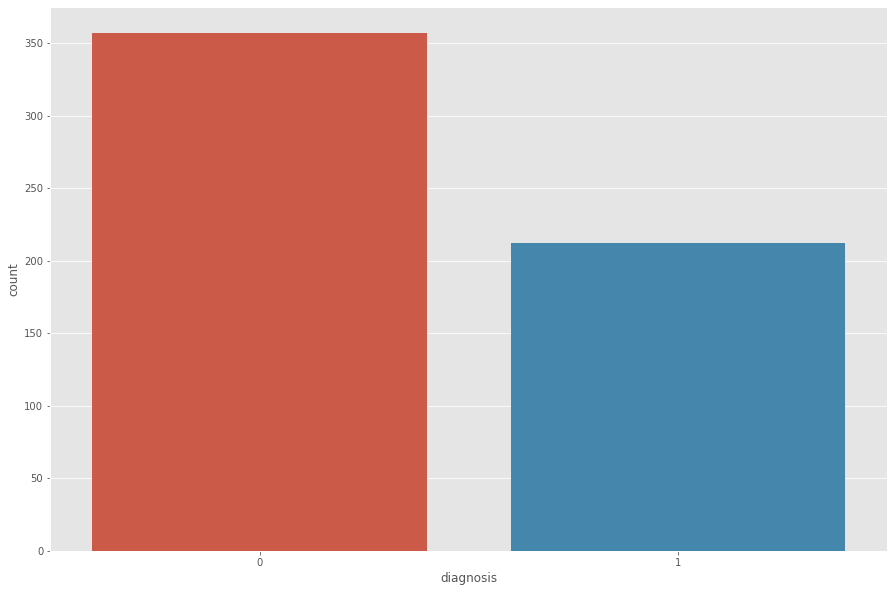

In [13]:
# Generating a countplot
sns.countplot(x=df['diagnosis'])

<br>

<br>

In [14]:
# Finding correlations in the data
correlations = df.corr()

In [15]:
correlations

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<br>

<br>

Text(0.5, 1.0, 'Heat Map')

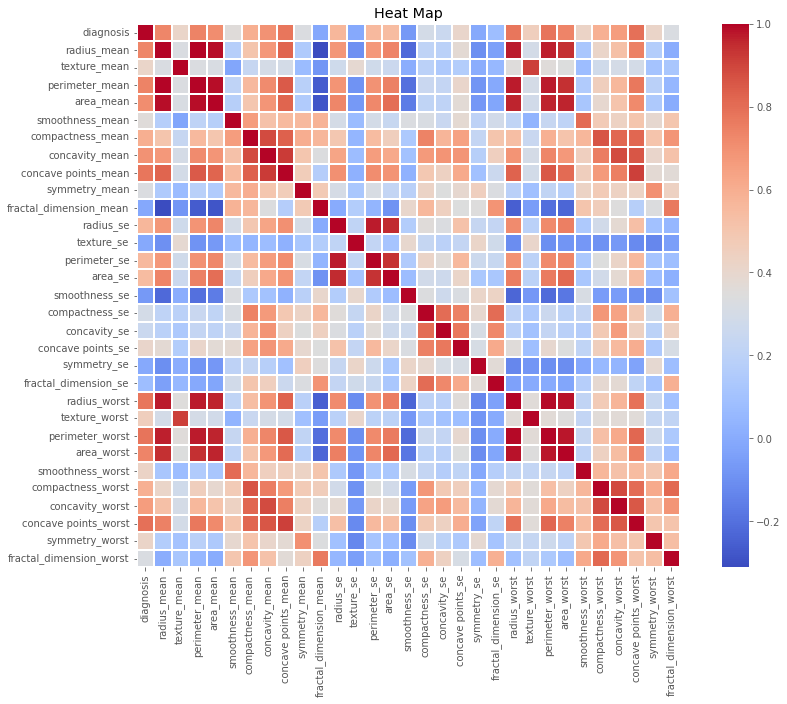

In [16]:
# generating a heatmap.(data, colourmap, linewidth, shape, linecolour)
sns.heatmap(correlations, cmap='coolwarm', linewidths=0.1, square=True, linecolor='white')

# Adding a title
plt.title('Heat Map')


<br>

<br>

<br>

Using the above we can visualise features which relate to each other with 1 being the most positive relation.

- Radius, parameter and area are highly correlated. We can use these to help distinguish. 
- Compactness_mean, concavity_mean and concavepoint_mean are highly correlated. We can use these features also.  
- so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

The examined breast tissue has strong correlations with mean values.

<br>

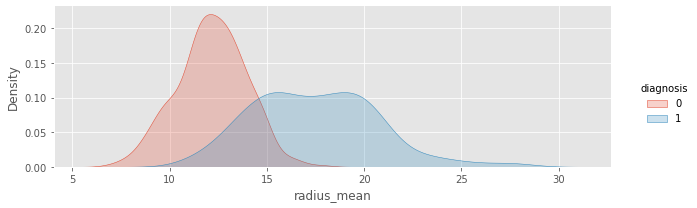

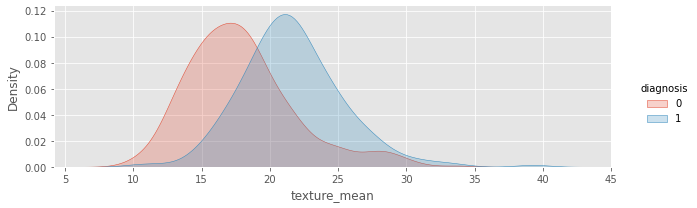

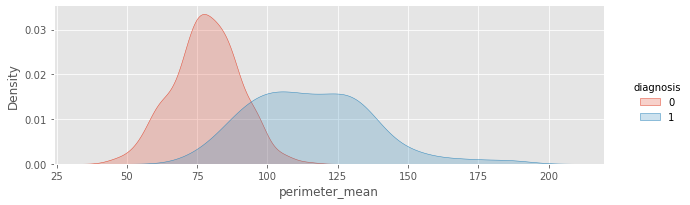

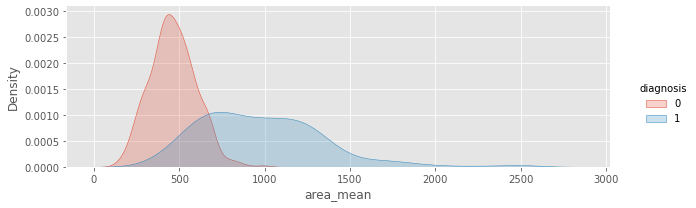

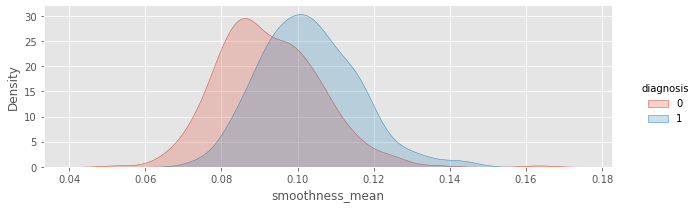

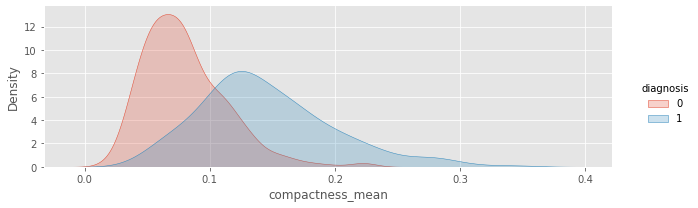

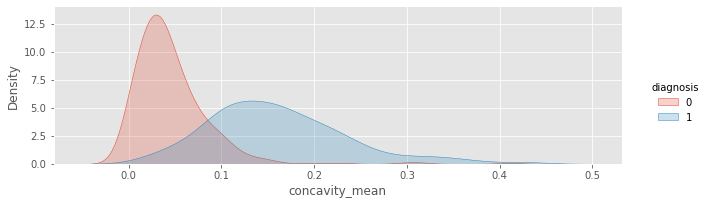

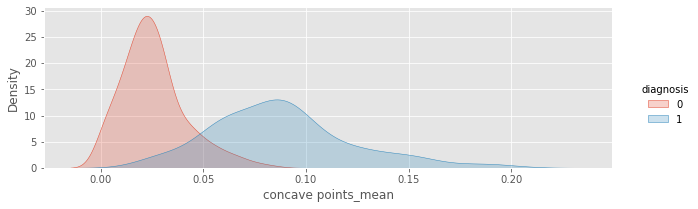

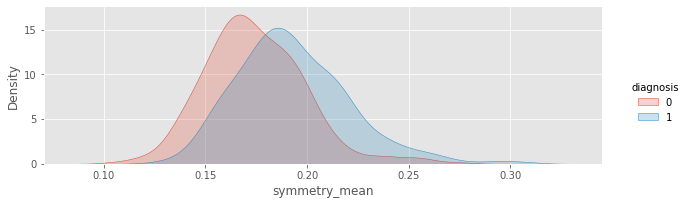

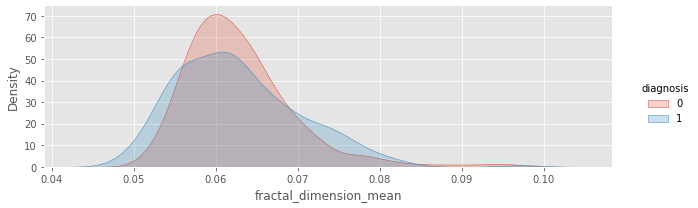

In [17]:
# Selecting columns that contain 'mean'
mean_columns = [columns for columns in df.columns 
                if columns.endswith('_mean')]

# Looping through the lenght 
for i in range(len(mean_columns)):
    #  FacetGrid helps visualising distribution of a variable
    sns.FacetGrid(df,hue="diagnosis",aspect=3,
                  # KDE is kernal density estimate
                  margin_titles=True).map(sns.kdeplot,mean_columns[i],shade= True).add_legend()
   

<br>

<br>

<br>

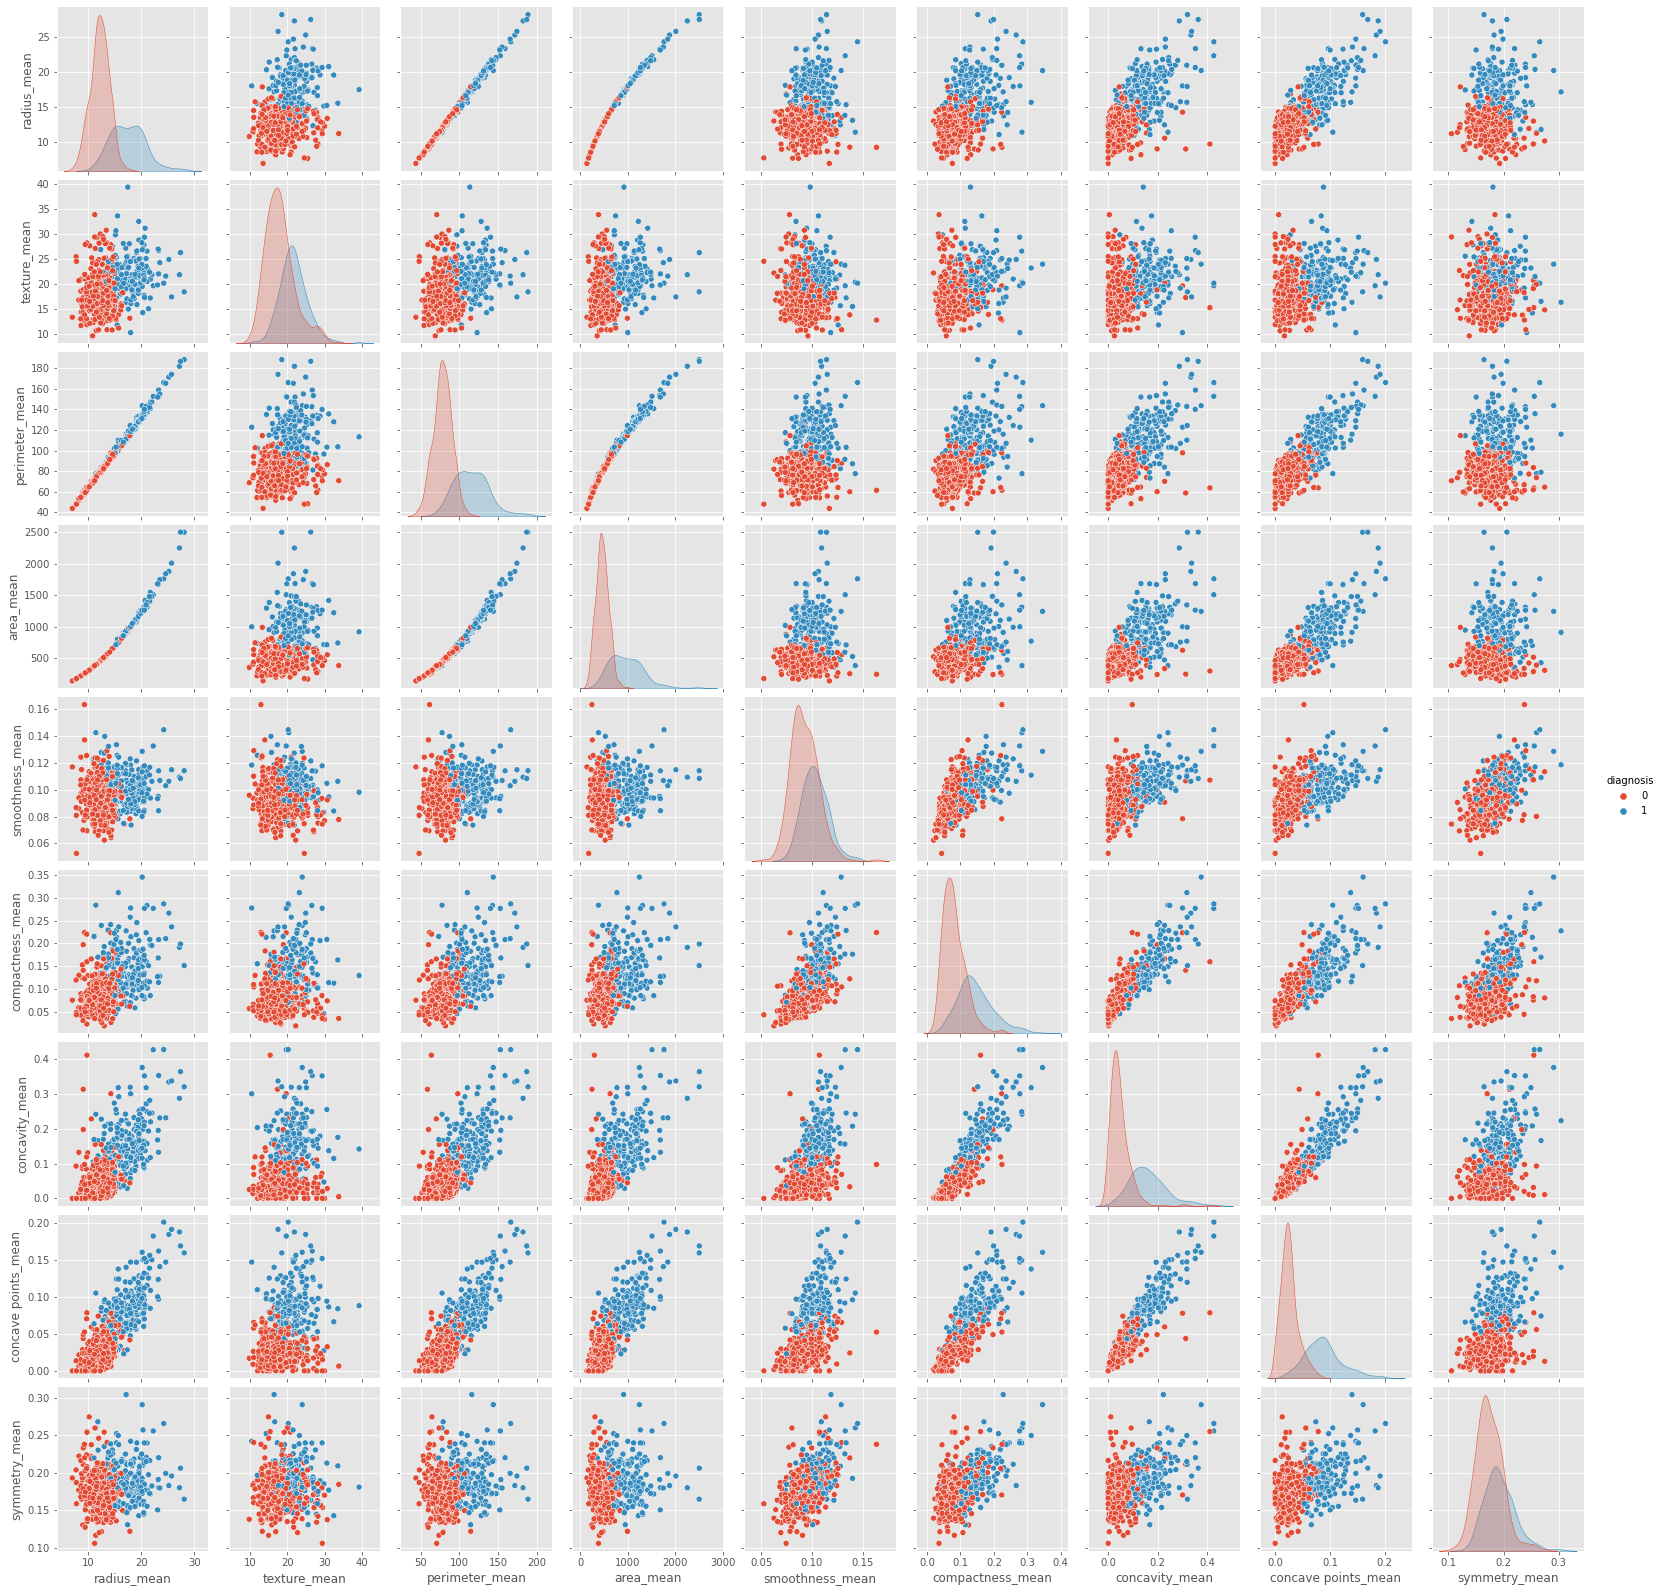

In [18]:
# Selecting features
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

# Generating a pairplot to see relationship between individual features and diagnosis
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

<br>

<br>

<br>

***

<br>

### Building The Model

<br>

The `Scikit-Learn` package makes it incredibly simple for us to build a model. `Scikit-learn` is organised into modules, this means we can simply import the desired algorithm with ease, KNN in this case.  

I consulted the following video when I had trouble building my model https://www.youtube.com/watch?v=ShxCPedWCDk)

<br>

##### Features and Labels

We need to split the data into features and labels 

- Features: What's used to predict if a lump is Benign (0) or Malignant (1)
- Labels: What we are trying to predict i.e., the diagnosis 

<br>

In [19]:
# Dropping 'diagnosis' from the features.
x = df.drop(['diagnosis'],axis=1)

# Making 'diagnosis' the target 
y = df['diagnosis']

<br>

<br>

#### Splitting Data into Test and Train

<br>

In [20]:
# Importing module to split and train data
from sklearn.model_selection import train_test_split

<br>

In [21]:
# Splitting data into 70/30 training/testing
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=40)

We use random state so the same data points are selected each time the code is run.

<br>

In [22]:
# Shape of the test and training sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


<br>

<br>

We can see that 398 (70%) samples are allocated to the training set and 171 samples (30%) was allocated to the test set.

<br>

<br>

#### Feature Scaling

<br>
Feature scaling is used to standardise independent features present in the data in a given range. It is used to handle highly varying magnitudes or values. If not done, <i>"... an algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values"</i> [25].

<br>

In [23]:
# Importing Scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

<br>

In [24]:
# Feature scaling train and test data
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

<br>

<br>

#### Testing The Model

<br>

In [25]:
# Loading KNN model 
from sklearn.neighbors import KNeighborsClassifier

<br>

In [26]:
# Setting Classifier. Default value of k is 5
knn = KNeighborsClassifier(n_neighbors=5)

# Updating model to fit traiining data
knn.fit(x_train, y_train)

KNeighborsClassifier()

<br>

<br>

#### Evaluating The Model

<br>

In [27]:
# Test
knn.score(x_test, y_test)

0.9649122807017544

<br>

In [28]:
# Predictions
predictions = knn.predict(x_test)
(predictions == y_test).value_counts()

True     165
False      6
Name: diagnosis, dtype: int64

<br>

In [29]:
# Checking the accuracy of the model
accuracy = knn.score(x_test, y_test)

In [30]:
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.9649122807017544



Our model will predict wether a tumor is Beigin or Mailigant with 96% accuracy.  


<br>

### Best value for K

<br>

In most cases 96% accuracy is great, but since this is for the detection of cancerous cells let's see if we can improve upon our model.

<br>

In [31]:
# Emplty list
error_rate = []

# Looping
for i in range(1,40):
    # Try K number 1 - 40
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the data
    knn.fit(x_train,y_train)
    #Predictions
    pred_i = knn.predict(x_test)
    # Add to the list
    error_rate.append(np.mean(pred_i != y_test))

<br>

Text(0, 0.5, 'Error Rate')

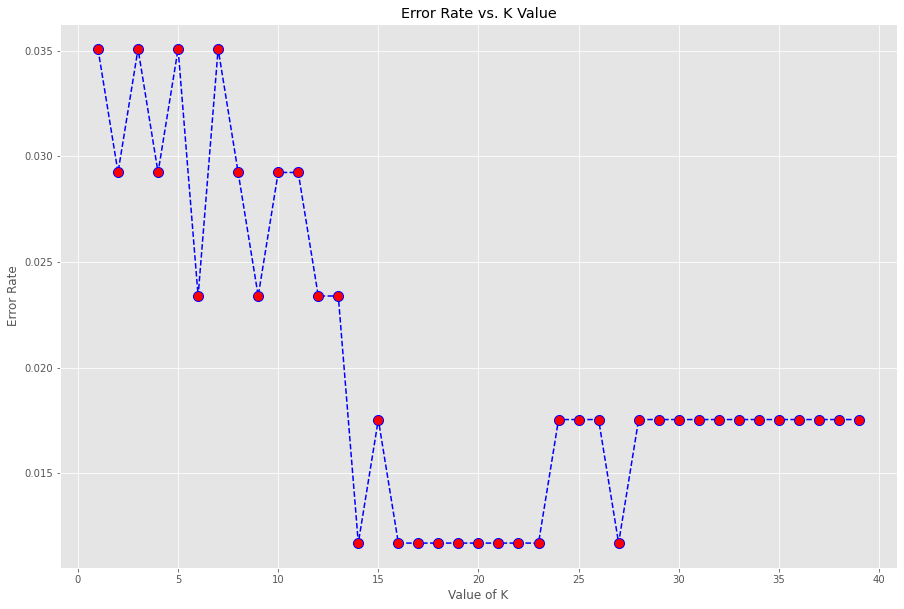

In [32]:
# Plotting K values
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# Adding a title
plt.title('Error Rate vs. K Value')

# Labelling x and y axis
plt.xlabel('Value of K')
plt.ylabel('Error Rate')

<br>

<br>

Using the plot above we can see that the best fit for k is in and around 20. Let's update the model to see if we get a better result.

<br>

In [33]:
# Loading KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Setting Classifier. Default value of k is 20
knn = KNeighborsClassifier(n_neighbors=20)

# Updating model to fit traiining data
knn.fit(x_train, y_train)

# Checking the accuracy of the model
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.9883040935672515



<br>

In this case, by increasing the number of neighbours the model's accuracy has improved!

<br>

<br>

***

## Linear Regression

***

[Documentation for Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

<br>

<i>"Regression searches for relationships among variables”</i> [26].

Regression analysis is a way of mathematically sorting out which variables impact an outcome. It helps answer; what are the most important features/variables and their relationships [27]. e.g., the relationship speeding has on road accidents. 

In regression, there are two types of variables:
Dependent: also referred to as dependent features, this is what you are trying to figure out these are outputs or responses.
Independent: also known as independent features, features you believe to impact dependent variables, these are inputs or predictors [28].  

<br>

#### Types of Regression
- Linear Regression
- Logistic Regression
- Polynomial Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression
- Ridge Regression
- Lasso Regression

<br>

<br>

There are a number of regression models available in `scikit-learn`, for this assessment we will focus on Linear regression. 

Probably the most known machine algorithm, linear regression is a model which identifies and investigates the relationship between two variables [28]. 

<i>“The term "linearity" in algebra refers to a linear relationship between two or more variables. We plot the independent variable on the x-axis and the dependent variable on the y axis. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line” </i>[29]. This is the regression line, it's a straight line which best fits the data i.e. overall distance from the line to the data points (variables) is the smallest [30]. 

<br></br>

![img](images/linear_reg.PNG)

<br></br>

The linear regression algorithm shows the best value intercept and the slope. X and Y (variables) never change as this is our data. The only thing we control is the intercept and slope. The algorithm <i>“...fits multiple lines on the data points and returns the line that results in the least error”</i> [29].

<br></br>

**Multiple Linear Regression** is when there are more than two variables. In this instance, the dependent variable is dependent upon multiple independent variables [30].

<br>

<br>

##### Linear Regression Assumptions

To make sure a linear regression algorithm can be used on your data: 

- Variables should be measured at a continuous level. Examples of continuous variables are time, sales, weight and test scores. 
- Observations are independent of each other (i.e., no dependency).
- No significant outliers. 
- Homoscedasticity - <i>"a statistical concept in which the variances along the best-fit linear-regression line remain similar all through that line"<i> [31].
- Residual (error) values follow the normal distribution [31].

<br>

<br>

##### Advantages:

- Simple to implement
- Fits linearly separable datasets almost perfectly. It is the least complex model to use in these cases.
- Overfitting can be reduced: if fitted too close, a model can gather <i>“noisy data”</i> (meaningless data) which impacts performance and reduces accuracy [32]. 


<br>

<br>

##### Disadvantages:

- Outliers can greatly affect the model’s performance and reduce accuracy.
- Multicollinearity: this is <i>"...where more than two explanatory variables in a multiple regression model are highly linearly related"</i> [30], as linear regression assumes a linear relationship between variables (i.e., a straight-line relationship) the power of a linear regression model's ability to   identify significantly important independent variables is reduced [30]
- As it assumes a linear relationship, the algorithm it fails to fit complex datasets properly, as most real-life scenarios the variable relationship isn't linear [32].

<br>

<br>

Once again, `Scikit-Learn` makes it easy to implement this machine learning algorithm by condensing it into a few lines of code. Let's put this into practice using the `Salary_Data` dataset which was downloaded from Kaggle, [which can be found here](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression?select=Salary_Data.csv). 

<br>

<br>

![img](images/money.jpg)

<br>

### Data

<br>

In [34]:
# Loading the data
df = pd.read_csv('datasets/Salary.csv')

<br>

<br>

In [35]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<br>

<br>

In [36]:
df.shape

(35, 2)

<br>

<br>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


<br>

<br>

In [38]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<br>

<br>

In [39]:
# Checking correlations in the data
correlation = df.corr()

In [40]:
correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


<br>

<br>

## Visualisation

<br>

Text(0.5, 1.0, 'Heat Map')

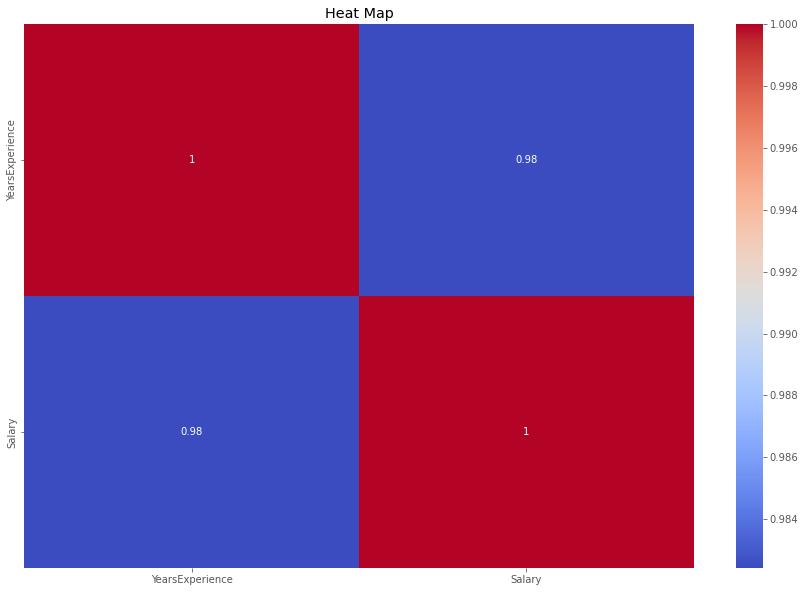

In [41]:
# Generating a heatmap based on the correlation
sns.heatmap(correlation, cmap='coolwarm', annot=True)

# Adding a title
plt.title('Heat Map')

<br>

<br>

<br>

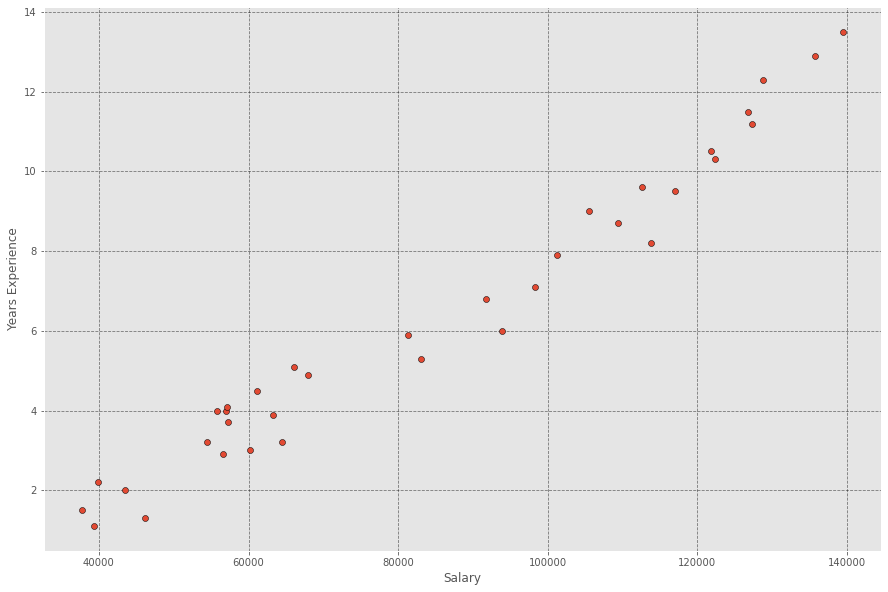

In [42]:
# Generating a scatterplot
plt.scatter(x=df['Salary'], y=df['YearsExperience'], marker='o', edgecolors='black')

# Adding labels to the x and y axis
plt.xlabel('Salary')
plt.ylabel('Years Experience')

# Adding a grid
plt.grid(color='black', linestyle='--', alpha=0.5)

<br>

<br>

<br>

Text(0.5, 0, 'YearsExperience')

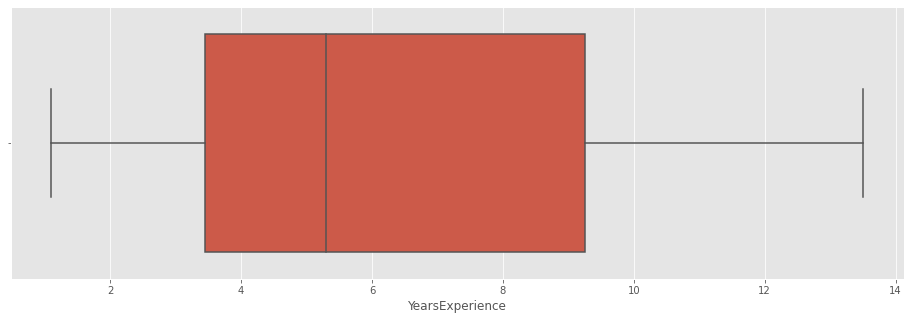

In [43]:
# Changing figure size. Too cramped in previous set default
plt.figure(figsize=(16,5))

# Generating a boxplot 
sns.boxplot(x=df['YearsExperience'], orient='h')

# Adding labels to x axis
plt.xlabel('YearsExperience')

<br>

<br>

<br>

Text(0.5, 0, 'Salary')

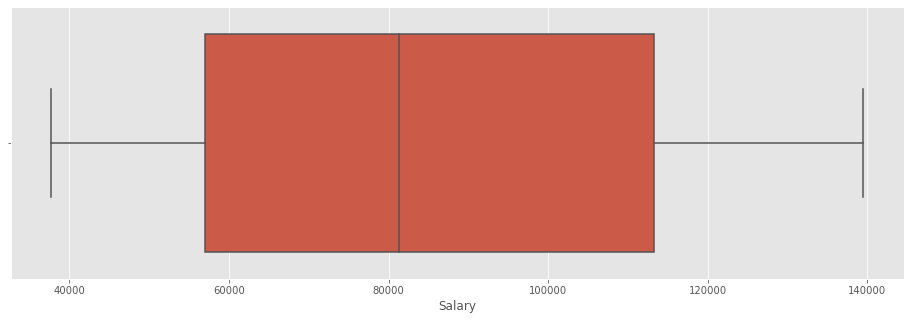

In [44]:
# Changing figure size. Too cramped in previous set default
plt.figure(figsize=(16,5))

# Generating a boxplot 
sns.boxplot(x=df['Salary'], orient='h')

# Adding labels to x axis
plt.xlabel('Salary')

<br>

<br>

<br>

<br>

No outliers in the data set.

<br>

<br>

<br>

<br>

<AxesSubplot:xlabel='Salary', ylabel='Density'>

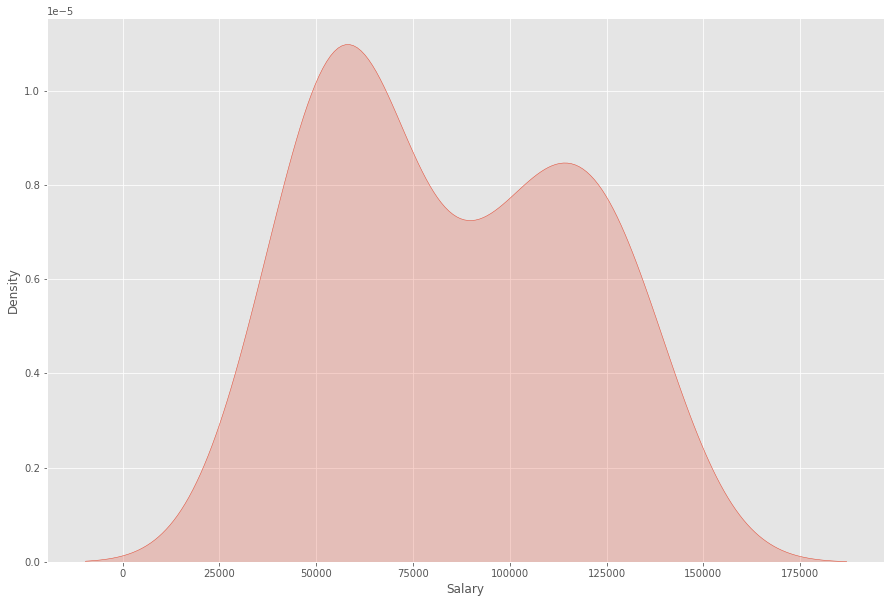

In [45]:
# Showing distribution
#KDE represents the data using a continuous probability
sns.kdeplot(df['Salary'], shade=True)

<br>

<br>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '37731'),
  Text(1, 0, '39343'),
  Text(2, 0, '39891'),
  Text(3, 0, '43525'),
  Text(4, 0, '46205'),
  Text(5, 0, '54445'),
  Text(6, 0, '55794'),
  Text(7, 0, '56642'),
  Text(8, 0, '56957'),
  Text(9, 0, '57081'),
  Text(10, 0, '57189'),
  Text(11, 0, '60150'),
  Text(12, 0, '61111'),
  Text(13, 0, '63218'),
  Text(14, 0, '64445'),
  Text(15, 0, '66029'),
  Text(16, 0, '67938'),
  Text(17, 0, '81363'),
  Text(18, 0, '83088'),
  Text(19, 0, '91738'),
  Text(20, 0, '93940'),
  Text(21, 0, '98273'),
  Text(22, 0, '101302'),
  Text(23, 0, '105582'),
  Text(24, 0, '109431'),
  Text(25, 0, '112635'),
  Text(26, 0, '113812'),
  Text(27, 0, '116969'),
  Text(28, 0, '121872'),
  Text(29, 0, '122391'),
  Text(30, 0, '126756'),
  Text(31, 0, '127345'),
  Text(32, 0, '128765'),
  Text(33, 0, '135675'),
  Text(34, 0, '1

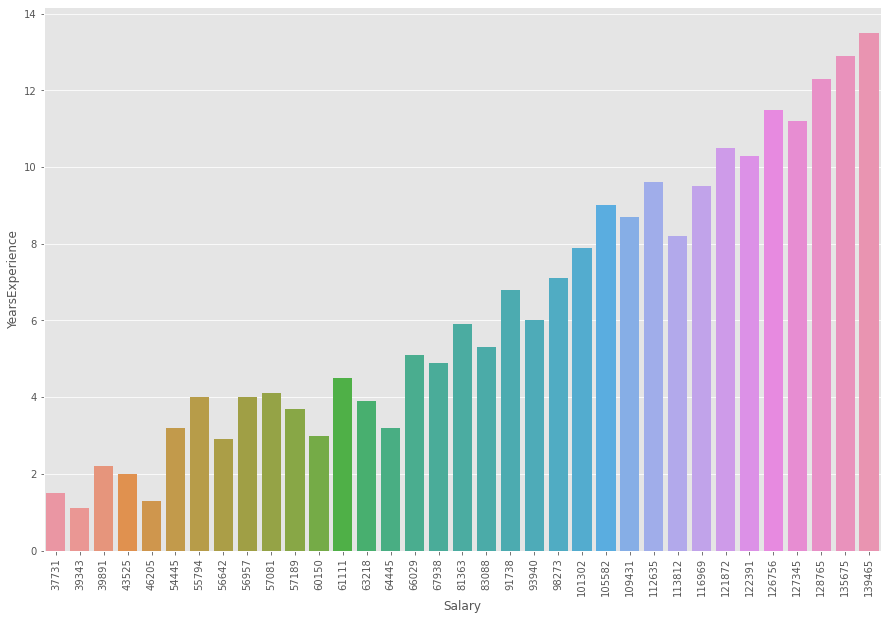

In [46]:
# Generating a barplot
sns.barplot(x=df['Salary'], y=df["YearsExperience"] ,data=df)

# Chaning text posistion of x ticks
plt.xticks(rotation="vertical")


<br>

<br>

### Building The Model

<br>

<br>

We will need to first split up our data into an x array that contains the features to train on, and a y array with the target variable.

<br>

<br>

In [47]:
# Dropping 'Salary' from the features.
x = df['YearsExperience']
x = x.values.reshape(-1, 1) # reshaping x


# Making 'Salary' the target 
y = df['Salary']

<br>

<br>

In [48]:
# Importing algorithm
from sklearn.linear_model import LinearRegression

In [49]:
# Setting Classifier
lr = LinearRegression()

<br>

<br>

### Splitting Data

<br>

In [50]:
from sklearn.model_selection import train_test_split

# Splitting the data into test and train 20/80
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

<br>

In [51]:
# Shape of the test and training sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(28, 1) (7, 1) (28,) (7,)


<br>

<br>

### Training The Model

<br>

In [52]:
# Updating model to fit traiining data
lr.fit(x_train, y_train)

LinearRegression()

<br>

<br>

The intercept (often labelled as constant) is the point where the function crosses the y-axis.

The coefficient tells you how much the dependent variable is expected to increase

<br>

<br>

In [53]:
# Getting the coefficient
coef = lr.coef_

# Getting the intercept
intercept = lr.intercept_

# Formula for salary
print("salary = " + str(coef) + " * YearsExperience + "+str(intercept))

salary = [8775.99513323] * YearsExperience + 29075.271397297947


<br>

<br>

In [54]:
# Predicting salary for 1 years experince
lr.predict([[1]])

array([37851.26653052])

<br>

In [55]:
# Predicting salary for 10 years experince
lr.predict([[10]])

array([116835.22272955])

<br>

<br>

### Testing and Evaluating The Model

<br>

Behind the scenes, the linear regression model finds the best value for the intercept and slope, resulting in a line which best fits the data. 

<br>

In [56]:
# Testing Accuracy
lr.score(x, y)

0.9648962240256952

<br>

In [57]:
# Predictions
y_pred = lr.predict(x_test)

<br>

<br>

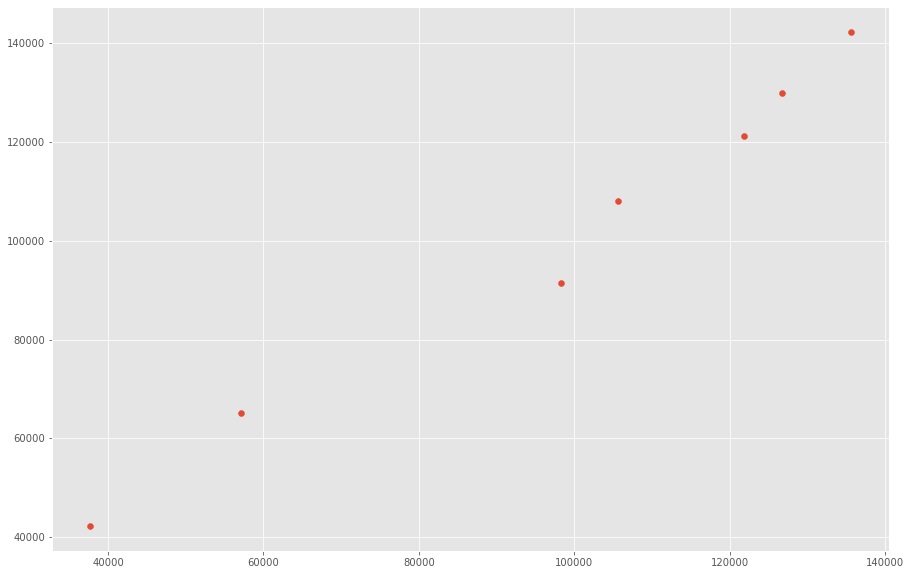

In [58]:
# Generating a scatterplot for test data
plt.scatter(y_test,y_pred)

<br>

<br>

<AxesSubplot:xlabel='Salary'>

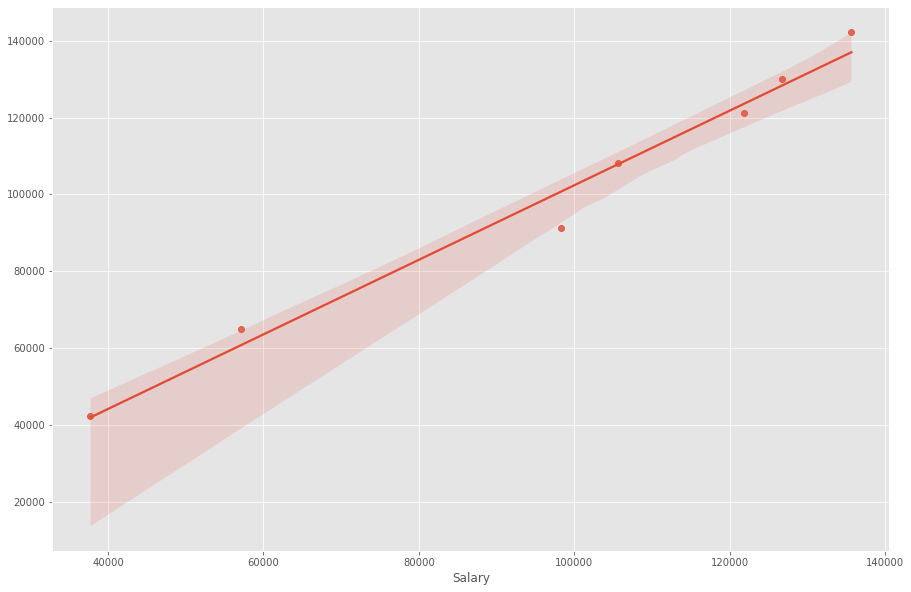

In [59]:
# Generates a linear regression model fit
sns.regplot(x=y_test, y=y_pred)

<br>

<br>

In [60]:
# Reshaping test data
y_test.shape
y_test_matrix = y_test.values.reshape(-1,1)
y_test_matrix

array([[ 37731],
       [ 57081],
       [ 98273],
       [126756],
       [121872],
       [135675],
       [105582]], dtype=int64)

<br>

<br>

<br>

[The following two cells of code was taken from here. ](https://www.kaggle.com/parthsoni1007/salary-prediction-using-linear-regression)

<br>

In [61]:
# Creating a new dataframe. flatten returns a copy of the array in one dimensional
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':y_pred.flatten()})
dframe.head(7)

,actual,Predicted
0,37731,42239.264097
1,57081,65056.851444
2,98273,91384.836843
3,126756,129999.215429
4,121872,121223.220296
5,135675,142285.608616
6,105582,108059.227596


<br>

<br>

Text(0, 0.5, 'Salary')

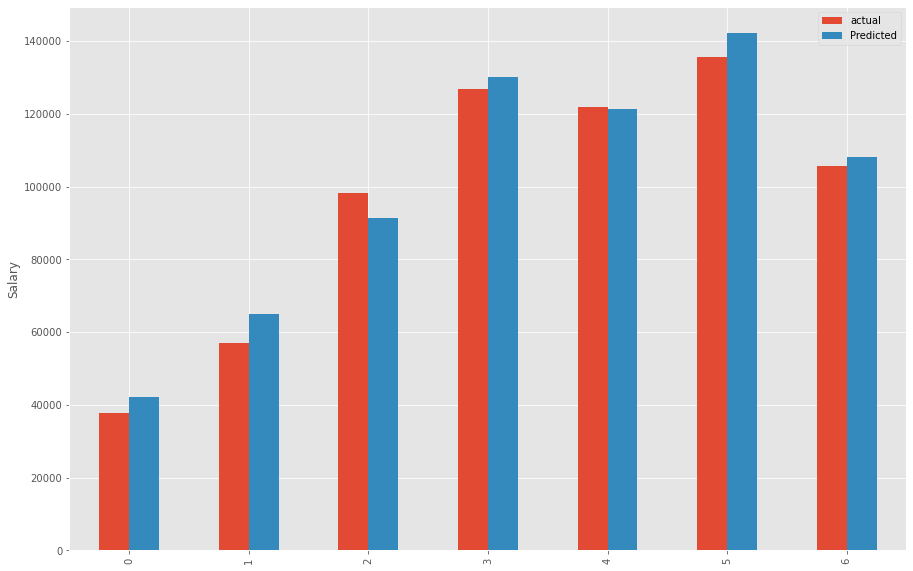

In [62]:
# PLotting a barplot
graph =dframe.head(7)
graph.plot(kind='bar')

# Labelling y axis
plt.ylabel('Salary')

<br>

<br>

<br>

##### Coefficient of Determination (R2 score)

<br>


The R2 score is used to evaluate a linear regression models performance. 
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y [Documentation for r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

<br>

<br>

In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 score: "+str(r2))

R2 score: 0.9765059258552102


<br>

<br>

With the best possible score being 1, our R2 score means the model is working correctly.

<br>

<br>

***

## Support Vector Machine (SVM)

***

[Documentation for Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html)

<br>

<br>

SVM is a supervised machine learning algorithm which is mainly deployed in the case of classification problems but can also be used to solve regression problems [33]. It was <i>“...developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997”</i> [39].

<i>“The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.”</i> [33]

SVM can only perform binary classification (i.e., selecting between two classes). Although, we can employ different methods to do multi-class problems.
For multi-class problems, a binary classifier is created for each class, the result of which is either: 

The data point belongs to that class 
The data point does not belong to that class.

 The classifier with the highest score is selected as the output [37].
 
 An example of SVM is speech recognition, text classification, facial expression classification.

<br>

<br>

<br>

![img](images/svm.png)

<br>

**Support Vectors** - are data points which are closest to the hyperplane [34]. <i>“The margin is calculated as the perpendicular distance from the line to only the closest points Only these points are relevant in defining the line and in the construction of the classifier”</i> [35]. These points otherwise known as, support vectors, define the hyperplane.

**Hyperplane** - (in a 2D space) is a line which linearly separates and classifies a set of data (in classification problems). The further the distance (i.e. the margin) between the data points and the  hyperplane. This is known as the Maximal-Margin hyperplane [34].

The goal is to have the data points as distant from the hyperplane while still being on the correct side of it. The reason for this is that when new data points are added we can be confident it has been classed correctly [34]. 

The dimension of the hyperplane is dependent on the number of features. As previously mentioned, if it’s two features, the hyperplane is a line, if the number of features increases to say 3, the hyperplane becomes a two-dimensional plane [33].

<br>

#### Kernal Trick

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts non-separable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

- **Linear Kernel** can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
K(x, xi) = sum(x * xi)
- **Polynomial Kernel** is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
K(x,xi) = 1 + sum(x * xi)^d
Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

- **Radial Basis Function Kernel** is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
K(x,xi) = exp(-gamma * sum((x – xi^2))
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm [40].

<br>

##### Advantages:

- Accuracy
- Can handle complex nonlinear data points.
- Compared to other algorithms, overfitting isn’t as much of an issue.
- Flexibility: being able to choose the kernel provides a lot of flexibility.
- Effective in cases where the number of dimensions is bigger than the number of specimens [38]


<br>

##### Disadvantages 

- Not best used with large datasets.
- Doesn’t work as effectively when the target classes overlap.
- Selecting the correct kernel. Different kernels = different results.
- Longer training period 
- Computationally expensive [36]

<br>

<br>

### Datasets

<br>

To highlight its ease of use for anyone, `scikit-learn` contains some standard datasets. This means users are not required to download any file from some external websites and can begin exploring the package straight away [8]. [A list of available datasets can be found here.](https://scikit-learn.org/stable/datasets.html)

<br>

We will be using Fisher's famous Iris Dataset to show how to implement a SVM with `Scikit-Learn`.

<br>

<br>

![img](images/iris.png)

<br>

<br>

#### Data

<br>

In [64]:
# Importing dataset from datasets module
from sklearn.datasets import load_iris

# Loading data
iris = load_iris()

<br>

In [65]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Setting the target column
df['target'] = iris.target

<br>

<br>

In [66]:
# Retuns first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<br>

<br>

In [67]:
# Overview of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<br>

<br>

<br>

In [68]:
# Stats summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<br>

<br>

In [69]:
# Diving data into separate dataframes using slicing
setosadf=df.loc[df['target']== 0] # .loc gets the rows in Species == Iris-setosa
versicolordf=df.loc[df['target']==1] # .loc gets the rows in Species == Iris-virginica
virginicadf=df.loc[df['target']==2] # .loc gets the rows in Species == Iris-versicolor

<br>

<br>

In [70]:
# A summary of stats for each indivdual species
setosadf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


<br>

<br>

In [71]:
# A summary of stats for each indivdual species
versicolordf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


<br>

<br>

In [72]:
# A summary of stats for each indivdual species
virginicadf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


<br>

<br>

<br>

### Visualisation

<br>

Text(0.5, 1.0, 'Number of Occurances')

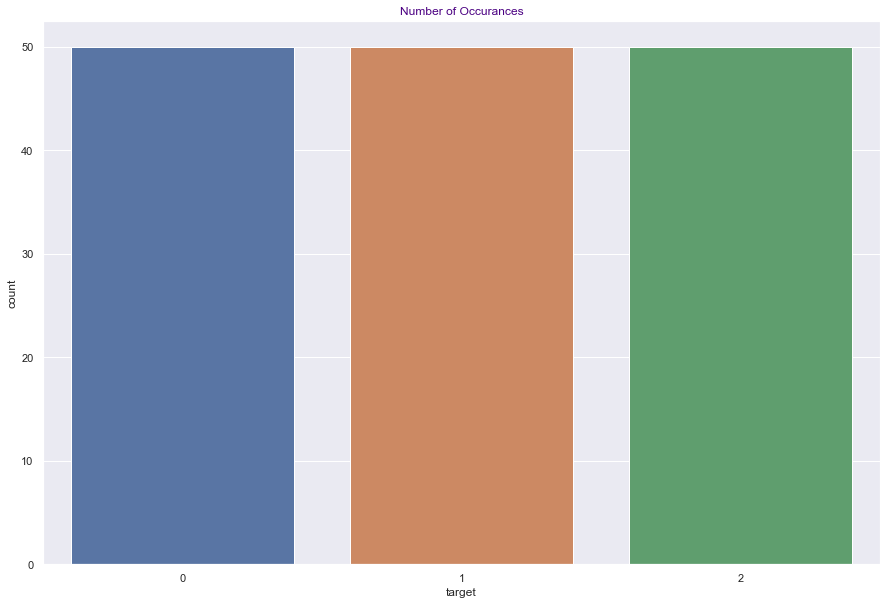

In [73]:
# Creating a countplot to show the number of instances of each species of iris
sns.set_theme(style="darkgrid") # Styling the grid

# Plotting on the X axes so it's a vertical countplot, using the df dataframe
sns.countplot(x="target", data=df)

# Adding a title 
plt.title('Number of Occurances', color='indigo')

<br>

<br>

<AxesSubplot:xlabel='petal width (cm)', ylabel='Count'>

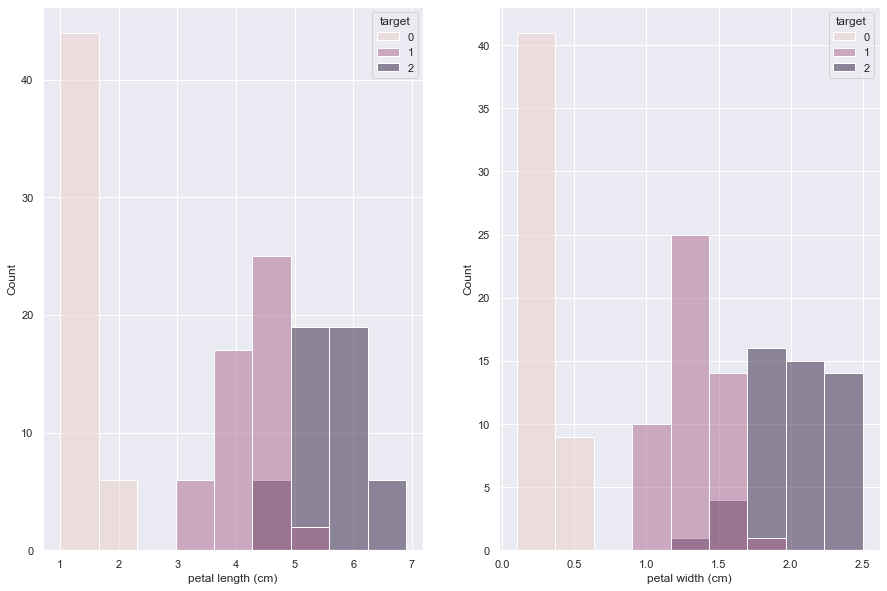

In [74]:
figure, axes = plt.subplots(1, 2)


# Generating a histogram for the first plot
sns.histplot(df, x='petal length (cm)', hue='target', kde=False, ax=axes[0])


# Generating a histogram for the second plot
sns.histplot(df, x='petal width (cm)', hue='target', kde=False, ax=axes[1])

<br>

<br>

<br>

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Count'>

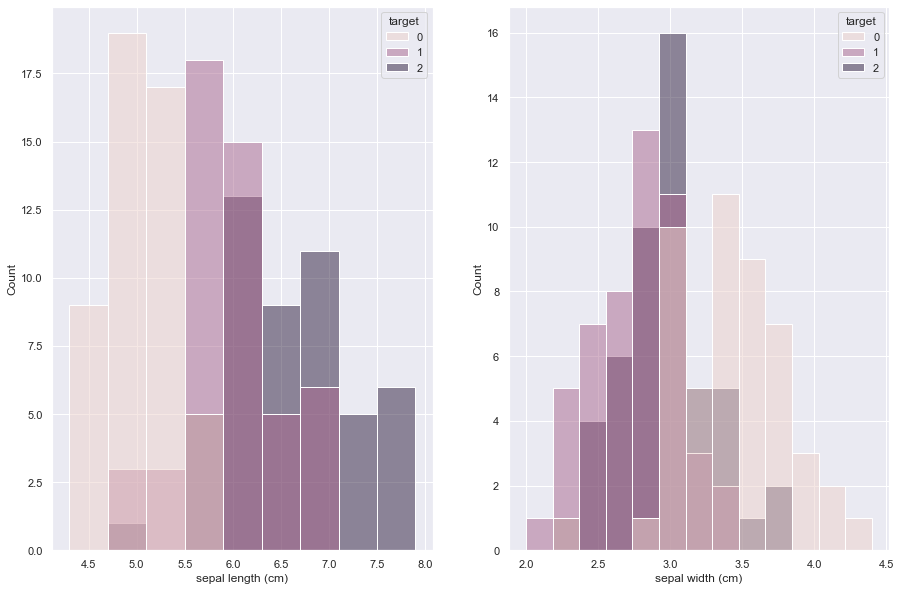

In [75]:
#  Generating a subplot 
figure, axes = plt.subplots(1, 2)

# Generating a histogram for the first plot
sns.histplot(df, x='sepal length (cm)', hue='target', kde=False,  ax=axes[0])

# Generating a histogram for the second plot
sns.histplot(df, x='sepal width (cm)', hue='target', kde=False,  ax=axes[1])

<br>

<br>

<br>

<br>

<br>

In [76]:
# Find correlations in the data
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<br>

<br>

<br>

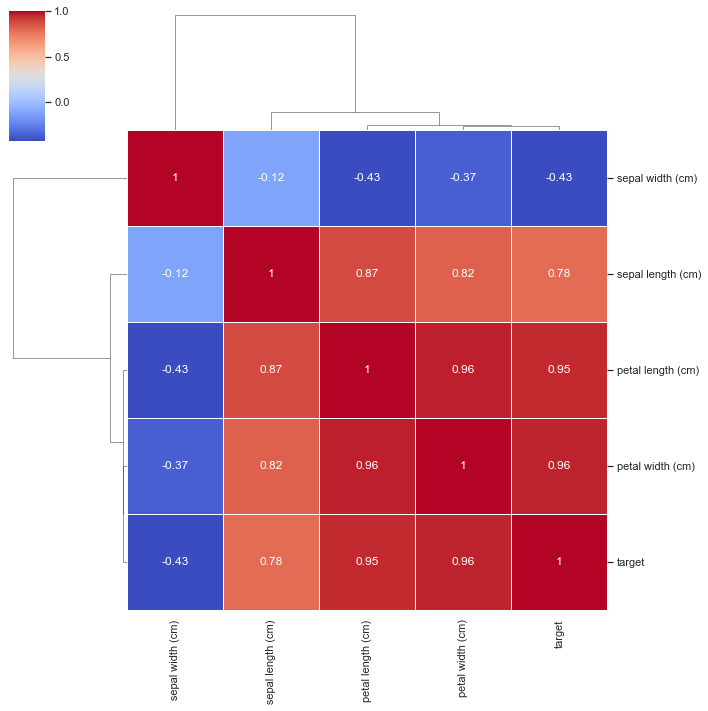

In [77]:
# Generating a clustermap to find relationships
cluster = sns.clustermap(df.corr(), cmap='coolwarm', linecolor='white',linewidths=0.5, annot=True)

<br>

<br>

<br>

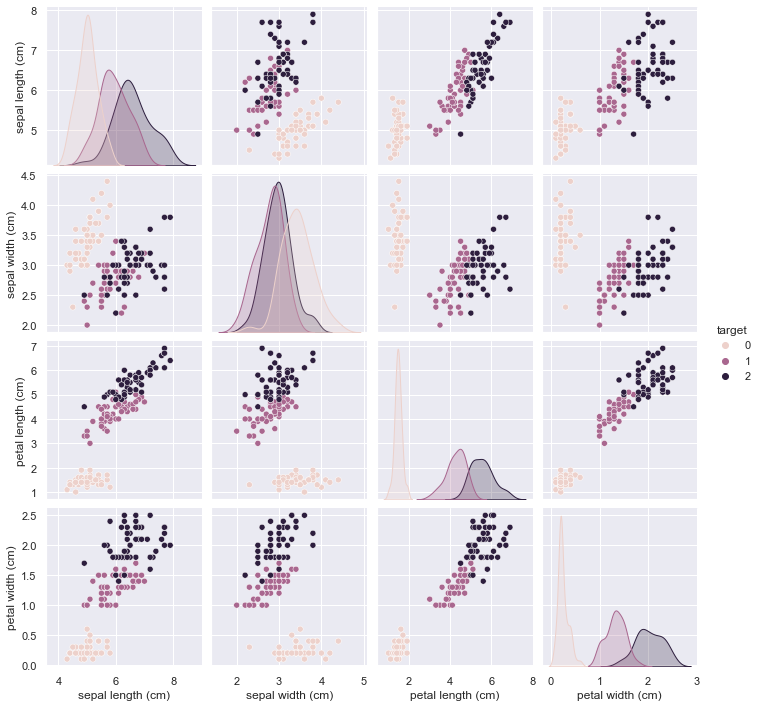

In [78]:
#  Generating a pairplot
# (dataframe, variable that will produce points with different colors (species), colour palette)
sns.pairplot(df, hue='target')

<br>

<br>

Based on the observations above. The petal features are the variables best used to help classify our data. Using `Scikit-Learn` let's build a SVM.

<br>

<br>

### Building a model

<br>

In [79]:
# loading algorithm 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

<br>

In [80]:
# Taking only the petal length and petal width
x = iris['data'][:, (2, 3)]  

In [81]:

y = df['target']

<br>

<br>

<br>

### Training The Model

<br>

In [82]:
# Splitting the data 20/80 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

<br>

<br>

In [83]:
# Setting classifer. Linear kernal for simple SVM
svm_clas = SVC(kernel='linear', random_state=40) 

<br>

<br>

In [84]:
# Training data
svm_clas.fit(x_train, y_train) 

SVC(kernel='linear', random_state=40)

<br>

<br>

### Evaluating The Model

<br>

In [85]:
# Testing and checking the accuracy of trained model
from sklearn.metrics import accuracy_score
y_pred = svm_clas.predict(x_test)

<br>

<br>

Accuracy can be computed by comparing actual test set values and predicted values.

<br>

In [86]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


<br>

<br>

In [87]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

<br>

In [88]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


<br>

<AxesSubplot:>

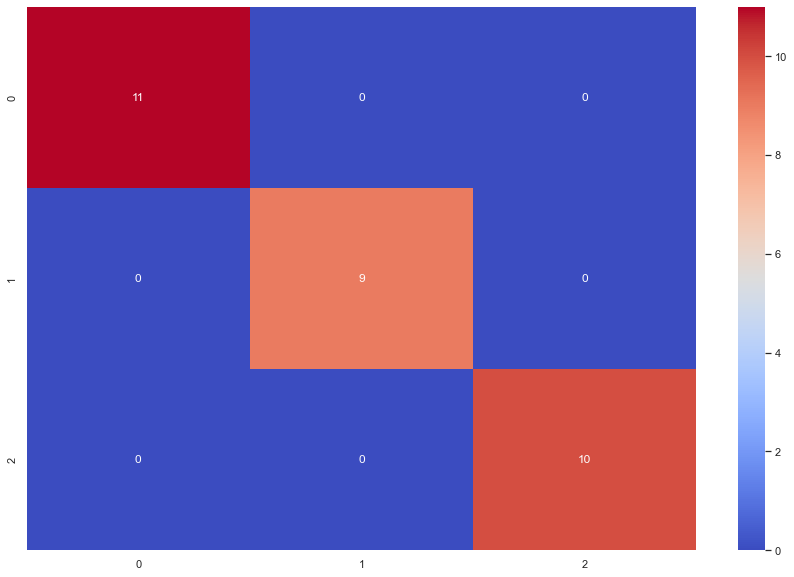

In [89]:
# Generating a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm')

<br>

<br>

- The model correctly predicted all 11 iris setosas.
- The model correctly predicted all 9 iris vericolours. 
- The model correctly predicted all 10 iris virginicas. 

<br>

<br>

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<br>

- **Precision**: accuracy of positive predictions. (True Positive/(True Positive + False Positive)).
- **Recall**: percent of the positive cases did you catch. (True Positive/(True Positive + False Negative)).
- **F1 score**: percent of positive predictions were correct. (2*(Recall * Precision) / (Recall + Precision)).
- **Support**: number of occurrences of the given class [41].

<br>

<br>

Our machine predicted with 100% accuracy!! 

<br>

<br>

***
***
## References

***

<br>

[1] 	Mueller JP, Massaron L. Machine Learning For Dummies. 2nd ed. Nashville, TN: John Wiley & Sons; 2021.
 	 
[2] 	Geron A. Hands-on machine learning with scikit-learn, keras, and tensorflow: Concepts, tools, and techniques to build intelligent systems [Internet]. 2nd ed. O’Reilly Media; 2019. Available from: https://play.google.com/store/books/details?id=HnetDwAAQBAJ
 	 
[3] 	What is scikit-learn? [Internet]. Codecademy.com. [cited 2021 Oct 29]. Available from: https://www.codecademy.com/articles/scikit-learn
 	 
[4] 	Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, et al. Scikit-learn: Machine Learning in Python. J Mach Learn Res. 2011;12(85):2825–30.
 	 
[5] 	Wikipedia contributors. BSD licenses [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 29]. Available from: https://en.wikipedia.org/w/index.php?title=BSD_licenses&oldid=1050065112
 	 
[6] 	Jolly K. Machine Learning with scikit-learn Quick Start Guide: Classification, regression, and clustering techniques in Python [Internet]. Birmingham, England: Packt Publishing; 2018. Available from: https://play.google.com/store/books/details?id=28t1DwAAQBAJ
 	 
[7] 	A comprehensive guide to scikit-learn (sklearn) [Internet]. Builtin.com. [cited 2021 Nov 1]. Available from: https://builtin.com/machine-learning/scikit-learn-guide
 	 
[8] 	7.1. Toy datasets [Internet]. Scikit-learn.org. [cited 2021 Nov 1]. Available from: https://scikit-learn.org/stable/datasets/toy_dataset.html
 	 
[9] 	Wikipedia contributors. API [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Nov 1]. Available from: https://en.wikipedia.org/w/index.php?title=API&oldid=1050906358
 	 
[10]	Statistical learning: the setting and the estimator object in scikit-learn [Internet]. Scikit-learn.org. [cited 2021 Nov 1]. Available from: https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html
 	 
[11] 	VanderPlas J. Introducing Scikit-Learn [Internet]. Github.io. [cited 2021 Nov 1]. Available from: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
 	 
[12]	Harrison O. Machine learning basics with the K-nearest neighbors algorithm [Internet]. Towards Data Science. 2018 [cited 2021 Oct 29]. Available from: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
 	 
[13] 	Cunningham P, Cord M, Delany SJ. Supervised Learning. In: Machine Learning Techniques for Multimedia. Berlin, Heidelberg: Springer Berlin Heidelberg; 2008. p. 21–49.
 	 
[14]	Brownlee J. 4 types of classification tasks in machine learning [Internet]. Machinelearningmastery.com. 2020 [cited 2021 Nov 1]. Available from: https://machinelearningmastery.com/types-of-classification-in-machine-learning/
 	 
[15]	Great Learning Team. What is Regression and how it works [Internet]. Mygreatlearning.com. 2021 [cited 2021 Nov 1]. Available from: https://www.mygreatlearning.com/blog/what-is-regression/
 	 
[16] 	Pratt MK. What is unsupervised learning? [Internet]. Techtarget.com. TechTarget; 2020 [cited 2021 Nov 1]. Available from: https://searchenterpriseai.techtarget.com/definition/unsupervised-learning
 	 
[17] 	Unsupervised Machine learning - Javatpoint [Internet]. Javatpoint.com. [cited 2021 Nov 1]. Available from: https://www.javatpoint.com/unsupervised-machine-learning
 	 
[18]	Wikipedia contributors. K-nearest neighbors algorithm [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Nov 1]. Available from: https://en.wikipedia.org/w/index.php?title=K-nearest_neighbors_algorithm&oldid=1051590352
 	 
[19] 	Dwivedi R. How does K-nearest neighbor works in machine learning [Internet]. Analyticssteps.com. [cited 2021 Nov 1]. Available from: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem
 	 
[20] 	How does KNN algorithm work ? What are the advantages and disadvantages of KNN ? [Internet]. Machinelearninginterview.com. 2019 [cited 2021 Nov 1]. Available from: https://machinelearninginterview.com/topics/machine-learning/how-does-knn-algorithm-work-what-are-the-advantages-and-disadvantages-of-knn/
 	 
[21]	K-Nearest Neighbor(KNN) Algorithm for Machine Learning [Internet]. Javatpoint.com. [cited 2021 Nov 1]. Available from: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
 	 
[22] 	Chatterjee M. The introduction of KNN algorithm [Internet]. Mygreatlearning.com. 2020 [cited 2021 Nov 1]. Available from: https://www.mygreatlearning.com/blog/knn-algorithm-introduction/
 	 
[23] 	Lubis Z, Sihombing P, Mawengkang H. Optimization of K Value at the K-NN algorithm in clustering using the expectation maximization algorithm. IOP Conf Ser Mater Sci Eng. 2020;725:012133.
 	 
[24] 	Singh A. K-Nearest Neighbors algorithm [Internet]. Analyticsvidhya.com. 2018 [cited 2021 Nov 1]. Available from: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
 	 
[25] 	ML | Feature Scaling – Part 2 [Internet]. Geeksforgeeks.org. 2018 [cited 2021 Nov 2]. Available from: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
 	 
[26]	Python R. Linear Regression in Python [Internet]. Realpython.com. Real Python; 2019 [cited 2021 Nov 2]. Available from: https://realpython.com/linear-regression-in-python/
 	 
[27]	A Refresher on Regression Analysis. Harvard business review [Internet]. 2015 Nov 4 [cited 2021 Nov 2]; Available from: https://hbr.org/2015/11/a-refresher-on-regression-analysis
 	 
[28]	Bevans R. An introduction to simple linear regression [Internet]. Scribbr.com. 2020 [cited 2021 Nov 2]. Available from: https://www.scribbr.com/statistics/simple-linear-regression/
 	 
[29]	Robinson S. Linear Regression in Python with Scikit-Learn [Internet]. Stackabuse.com. Stack Abuse; 2018 [cited 2021 Nov 2]. Available from: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
 	 
[30]	Great Learning. Step-by-step regression analysis - great learning - medium [Internet]. Medium. 2020 [cited 2021 Nov 2]. Available from: https://medium.com/@mygreatlearning/step-by-step-regression-analysis-f7e3e3ebf296
 	 
[31] 	About Linear Regression [Internet]. Ibm.com. [cited 2021 Nov 2]. Available from: https://www.ibm.com/topics/linear-regression
 	 
[32]	Singh N, Posts M. Advantages and disadvantages of Linear Regression [Internet]. Opengenus.org. OpenGenus IQ: Computing Expertise & Legacy; 2020 [cited 2021 Nov 2]. Available from: https://iq.opengenus.org/advantages-and-disadvantages-of-linear-regression/
 	 
[33] 	Gandhi R. Support vector machine — introduction to machine learning algorithms [Internet]. Towards Data Science. 2018 [cited 2021 Nov 3]. Available from: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
 	 
[34] 	Support Vector Machines for dummies; A Simple Explanation [Internet]. Aylien.com. [cited 2021 Nov 4]. Available from: https://aylien.com/blog/support-vector-machines-for-dummies-a-simple-explanation
 	 
[35]	Brownlee J. Support Vector Machines for machine learning [Internet]. Machinelearningmastery.com. 2016 [cited 2021 Nov 4]. Available from: https://machinelearningmastery.com/support-vector-machines-for-machine-learning/
 	 
[36]	Introduction to Support Vector Machines (SVM) [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Nov 4]. Available from: https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/
 	 
[37]	Introduction to Support Vector Machines (SVM) [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Nov 4]. Available from: https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/
 	 
[38]	Support vector machine in Machine Learning [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Nov 4]. Available from: https://www.geeksforgeeks.org/support-vector-machine-in-machine-learning/?ref=rp
 	 
[39]	Wikipedia contributors. Support-vector machine [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Nov 4]. Available from: https://en.wikipedia.org/w/index.php?title=Support-vector_machine&oldid=1053280132
 	 
[40]	Navlani A. Support Vector Machines with Scikit-learn [Internet]. www.datacamp.com. 2019 [cited 2021 Oct 4]. Available from: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
 	 
[41]	Understanding the Classification report through sklearn [Internet]. Muthu.co. [cited 2021 Nov 7]. Available from: https://muthu.co/understanding-the-classification-report-in-sklearn/
 	 


<br>

***
#### Images

- [README Header](https://enterprisersproject.com/sites/default/files/styles/google_discover/public/cio_ai.png?itok=2ezkRMrj)
- [Logo](https://blog.anybox.fr/content/images/2020/01/scikit-learn-1.png)
- [Features and Target](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)
- [Sckit-learn features](https://miro.medium.com/max/700/1*IHNY-j3mp00H_i6gb5DA-w.png)
- [Breast Cancer](https://cdn2.iconfinder.com/data/icons/breast-cancer-2/512/Breast-cancer-disease-ribbon-awareness-128.png)
- [KNN via datacamp](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)
- [Money](https://www.stylist.co.uk/images/app/uploads/2021/07/23124433/money-types-1-crop-1627040712-1467x1467.jpg?w=256&h=256&fit=max&auto=format%2Ccompress)
- [SVM via datacamp](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png)
- [Iris](https://miro.medium.com/max/1400/1*lFC_U5j_Y8IXF4Ga87KNVg.png)

***
***

# End